<a href="https://colab.research.google.com/github/DrMichaelGuo/Automation/blob/main/Automation_AI_Auditing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)


In [7]:
# Step 1: Generate synthetic data for 1,000,000 transactions
n_samples = 1_000_000  # 1 million transactions

# Generate normal transaction amounts (normally distributed around 100 with a std deviation of 20)
transaction_amounts = np.random.normal(loc=100, scale=20, size=n_samples)

# Generate transaction hours (0 to 23, uniformly distributed)
transaction_hours = np.random.randint(0, 24, size=n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'transaction_id': range(1, n_samples + 1),
    'transaction_amount': transaction_amounts,
    'transaction_hour': transaction_hours
})

In [8]:
# Step 2: Introduce anomalies (randomly selecting 0.1% of transactions)
anomaly_count = int(0.001 * n_samples)  # 0.1% anomalies
anomaly_indices = np.random.choice(n_samples, size=anomaly_count, replace=False)
data.loc[anomaly_indices, 'transaction_amount'] *= 5  # Amplify anomaly amounts

In [9]:
# Step 3: Apply Isolation Forest for anomaly detection
# Initialize model with 0.1% expected anomalies
model = IsolationForest(contamination=0.001, random_state=42, n_jobs=-1, verbose=1)
# Fit the model
model.fit(data[['transaction_amount', 'transaction_hour']])
# Predict anomalies
data['anomaly'] = model.predict(data[['transaction_amount', 'transaction_hour']])
# Map predictions: 1 (normal), -1 (anomaly)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.1s


In [10]:

# Step 4: Display detected anomalies
print("\nDetected Anomalies:")
print(data[data['anomaly'] == 1].head(20))  # Show first 20 anomalies


Detected Anomalies:
       transaction_id  transaction_amount  transaction_hour  anomaly
209               210          177.054630                23        1
1101             1102           42.074892                 0        1
1591             1592           41.572990                23        1
1926             1927           49.394250                 0        1
2024             2025           39.609757                22        1
2744             2745           49.408798                 0        1
4761             4762          566.884013                 0        1
4850             4851           47.503659                 0        1
5587             5588           45.217196                 0        1
5642             5643           43.339394                 0        1
5907             5908           42.009722                23        1
8200             8201           23.266889                23        1
10670           10671          577.969618                19        1
10766        

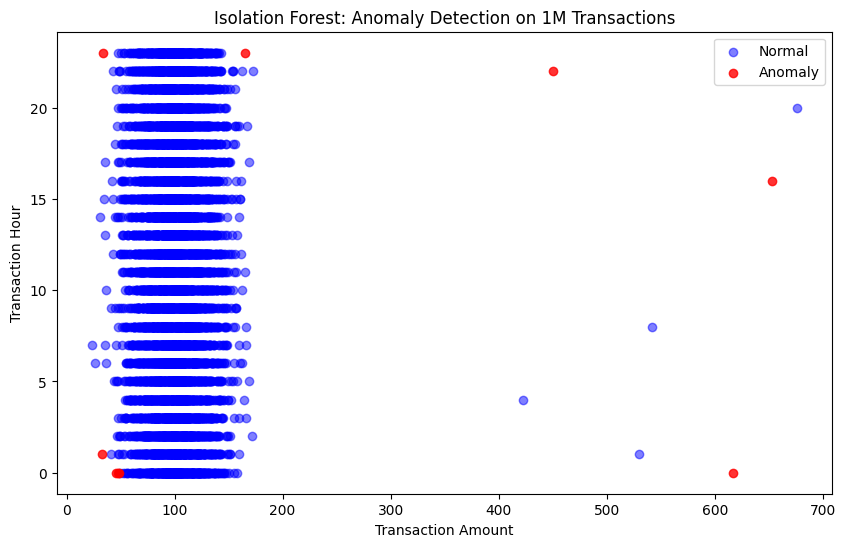

In [11]:
# Step 5: Visualize the results (sampling for efficiency)
sampled_data = data.sample(10000)  # Sample 10,000 points for plotting

plt.figure(figsize=(10, 6))
# Normal transactions (blue)
plt.scatter(sampled_data[sampled_data['anomaly'] == 0]['transaction_amount'],
            sampled_data[sampled_data['anomaly'] == 0]['transaction_hour'],
            c='blue', label='Normal', alpha=0.5)
# Anomalous transactions (red)
plt.scatter(sampled_data[sampled_data['anomaly'] == 1]['transaction_amount'],
            sampled_data[sampled_data['anomaly'] == 1]['transaction_hour'],
            c='red', label='Anomaly', alpha=0.8)
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title('Isolation Forest: Anomaly Detection on 1M Transactions')
plt.legend()
plt.show()
